In [34]:
'''Sentiment of the tweets from November regarding the 2020 elections'''

'Sentiment of the tweets from November regarding the 2020 elections'

In [2]:
import sys
import os
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import json


In [117]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\november'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [120]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [121]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames, ignore_index=True)

In [122]:
tweet_dataset.shape 

(184498, 5)

In [123]:
tweet_dataset.tail(200)

,Date,id,tweet,tweet_info,metadata
184298,2020-11-09 20:59:51,1325905969486974978,"b'RT @cbozy: Wait, so Trump passed a bill in 2...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184299,2020-11-09 20:59:51,1325905969474199552,"b""RT @costareports: Based on my convos with Rs...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184300,2020-11-09 20:59:51,1325905969470087170,"b'RT @gigglygukk: ""please love me""\n\nreply + ...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [{'text': 'JUNGKOOK', 'indices': ..."
184301,2020-11-09 20:59:51,1325905969461735425,b'RT @nhbaptiste: Biden: I will work with Repu...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184302,2020-11-09 20:59:51,1325905969453428736,"b""RT @ElieNYC: Basically everybody is trying t...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
...,...,...,...,...,...
184493,2020-11-09 20:59:50,1325905965485608961,b'RT @AlexandraChalup: Americans can rest well...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184494,2020-11-09 20:59:50,1325905965435203585,b'RT @realDonaldTrump: Georgia will be a big p...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184495,2020-11-09 20:59:50,1325905965426872321,"b'RT @pauloeneas: Kennedy Alencar: ""Bolsonaro ...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184496,2020-11-09 20:59:50,1325905965422534656,"b""RT @Vbretired: @realDonaldTrump I'm glad to ...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [124]:
# Cleaning Up the tweets

searched_tweets = []

for i in range(0,int(tweet_dataset.shape[0])):
    try:
        if tweet_dataset['tweet'][i] != None: 
            tweet = re.sub('[^a-zA-Z0-9]', ' ', str(tweet_dataset['tweet'][i]))
            tweet = re.sub("b'", '', tweet)
            tweet = re.sub('https', '', tweet)
            tweet = tweet.split()
            for j in range(len(tweet)):
                if len(tweet[j]) <= 3:
                    tweet[j] = ''
                elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                    tweet[j] = ''
                elif (len(tweet[j]) == 5) and (tweet[j][0]=='x'):
                    tweet[j] = ''
            tweet = ' '.join(tweet)
            searched_tweets.append(tweet)
    except:
        continue

In [125]:
print(len(searched_tweets))

184498


In [126]:
#Sentiment Analysis Report of all the tweets from november with hashtags related to the elections

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    try:
        analysis = TextBlob(tweet)
        if analysis.sentiment[0]>0:
           pos = pos +1
        elif analysis.sentiment[0]<0:
           neg = neg + 1
        else:
           neu = neu + 1
    except:
        continue
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  63464
Total Negative =  25440
Total Neutral =  95594


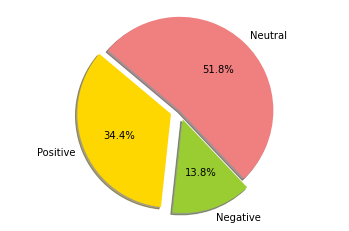

In [127]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()